# 13. Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import math

In [2]:
#load metadata
data = pd.read_csv("data/metadata/selection_sharp.csv")

In [3]:
#load all results
knn = pd.read_csv("data/results/knn.csv", header=None, index_col=0)
lr = pd.read_csv("data/results/lr.csv", header=None, index_col=0)
rf = pd.read_csv("data/results/rf.csv", header=None, index_col=0)
svm = pd.read_csv("data/results/svm.csv", header=None, index_col=0)
nn = pd.read_csv("data/results/nn.csv", header=None, index_col=0)

In [4]:
#aggregate in dataframe
agg = pd.concat([knn,lr,rf,svm,nn])

#rename column
agg.columns = ["accuracy"]

agg.sort_values("accuracy")

,accuracy
0,
Dummy Pool 1,0.176471
Dummy Pool 2,0.205479
KNN Pool 2 meta,0.500000
KNN Pool 1 meta,0.504202
SVM RBF Pool 2,0.893204
SVM RBF Pool 1,0.907563
KNN Pool 2,0.917476
Neural network Pool 2,0.922330
Random forest Pool 1 balanced,0.925134


In [5]:
#collect pools and process strings
pool1 = agg[agg.index.str.contains("1")&~agg.index.str.contains("balanced")&~agg.index.str.contains("meta")]
pool1.index = pool1.index.str.replace(" Pool 1", "")
pool1_bal = agg[agg.index.str.contains("1")&agg.index.str.contains("balanced")&~agg.index.str.contains("meta")]
pool1_bal.index = pool1_bal.index.str.replace(" Pool 1 balanced", "")
pool2 = agg[agg.index.str.contains("2")&~agg.index.str.contains("balanced")]
pool2.index = pool2.index.str.replace(" Pool 2", "")
pool2_bal = agg[agg.index.str.contains("2")&agg.index.str.contains("balanced")]
pool2_bal.index = pool2_bal.index.str.replace(" Pool 2 balanced", "")
pool1_meta = agg[agg.index.str.contains("1")&agg.index.str.contains("meta")&~agg.index.str.contains("balanced")]
pool1_meta.index = pool1_meta.index.str.replace(" Pool 1 meta", "")
pool2_meta = agg[agg.index.str.contains("2")&agg.index.str.contains("meta")&~agg.index.str.contains("balanced")]
pool2_meta.index = pool2_meta.index.str.replace(" Pool 2 meta", "")

In [6]:
#aggregate in dataframe
accuracy = pd.concat([pool1,pool2,pool1_bal,pool2_bal,pool1_meta, pool2_meta], axis=1, sort=True)
accuracy.columns = ["Pool 1", "Pool 2", "Pool 1 balanced", "Pool 2 balanced", "Pool 1 metadata","Pool 2 metadata"]
accuracy

,Pool 1,Pool 2,Pool 1 balanced,Pool 2 balanced,Pool 1 metadata,Pool 2 metadata
Dummy,0.176471,0.205479,NaN,NaN,NaN,NaN
KNN,0.957983,0.917476,NaN,0.972603,0.504202,0.5
KNN meta,NaN,0.500000,NaN,NaN,NaN,NaN
Logistic regression,0.957983,0.951456,NaN,NaN,NaN,NaN
Neural network,0.932773,0.922330,0.935829,0.931507,NaN,NaN
Random forest,0.936975,0.927184,0.925134,0.945205,NaN,NaN
SVM RBF,0.907563,0.893204,NaN,NaN,NaN,NaN
SVM linear,0.945378,0.946602,NaN,NaN,NaN,NaN


In [7]:
#sort values
pool1 = pool1.sort_values("accuracy")
pool2 = pool2.sort_values("accuracy")
pool1_bal = pool1_bal.sort_values("accuracy")
pool2_bal = pool2_bal.sort_values("accuracy")
pool1_meta = pool1_meta.sort_values("accuracy")

In [8]:
#iteratively create a list to display model names
names = []
for i in range(len(pool1)):
    names.append("{}, acc={}".format(pool1.index[i], round(pool1.iloc[i,0],2)))

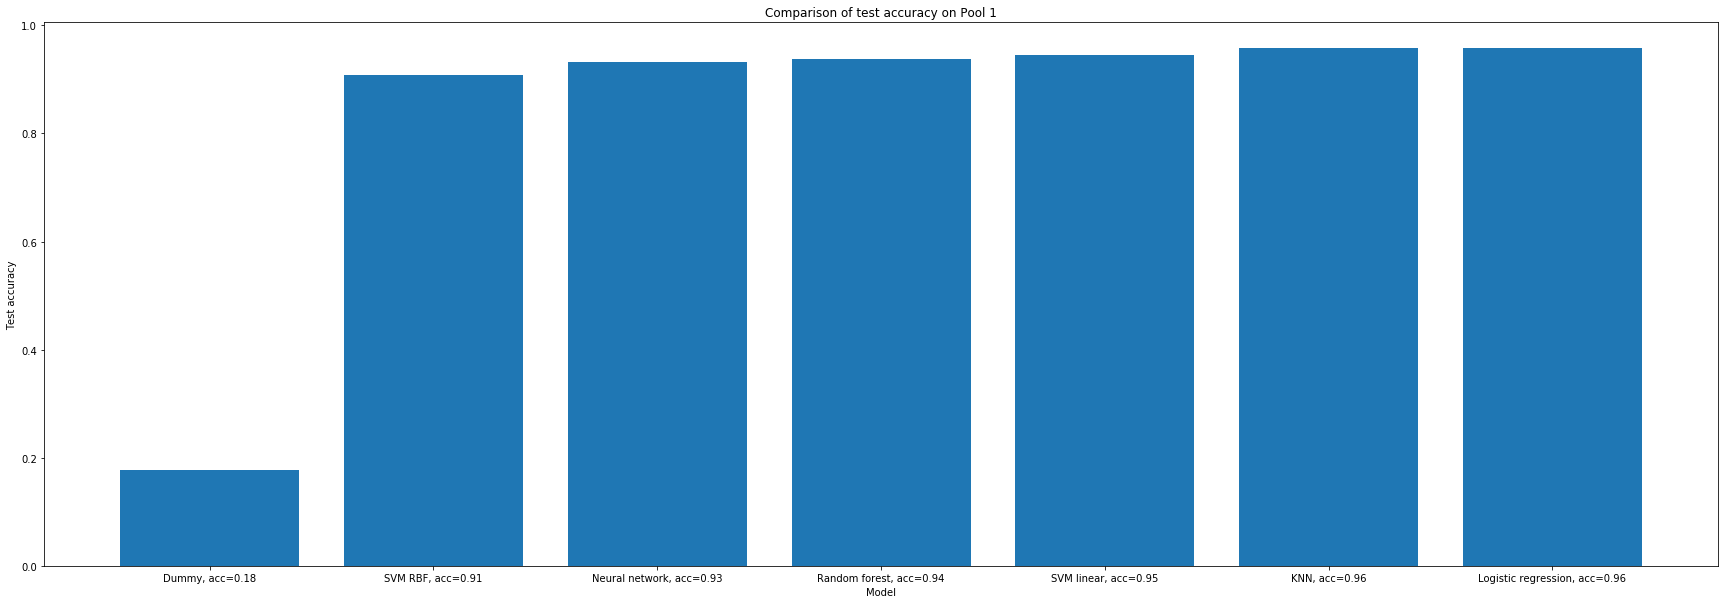

In [9]:
#plot accuracy of each model
plt.figure(figsize=(30,10))
plt.bar(list(np.arange(len(pool1))+1), list(pool1["accuracy"]))
plt.title("Comparison of test accuracy on Pool 1")

for i in range(len(pool1)):
    names
plt.xticks(list(np.arange(len(pool1))+1), names)
plt.xlabel("Model")
plt.ylabel("Test accuracy")
plt.show()

In [10]:
#iteratively create a list to display model names
names = []
for i in range(len(pool2)):
    names.append("{}, acc={}".format(pool2.index[i], round(pool2.iloc[i,0],2)))

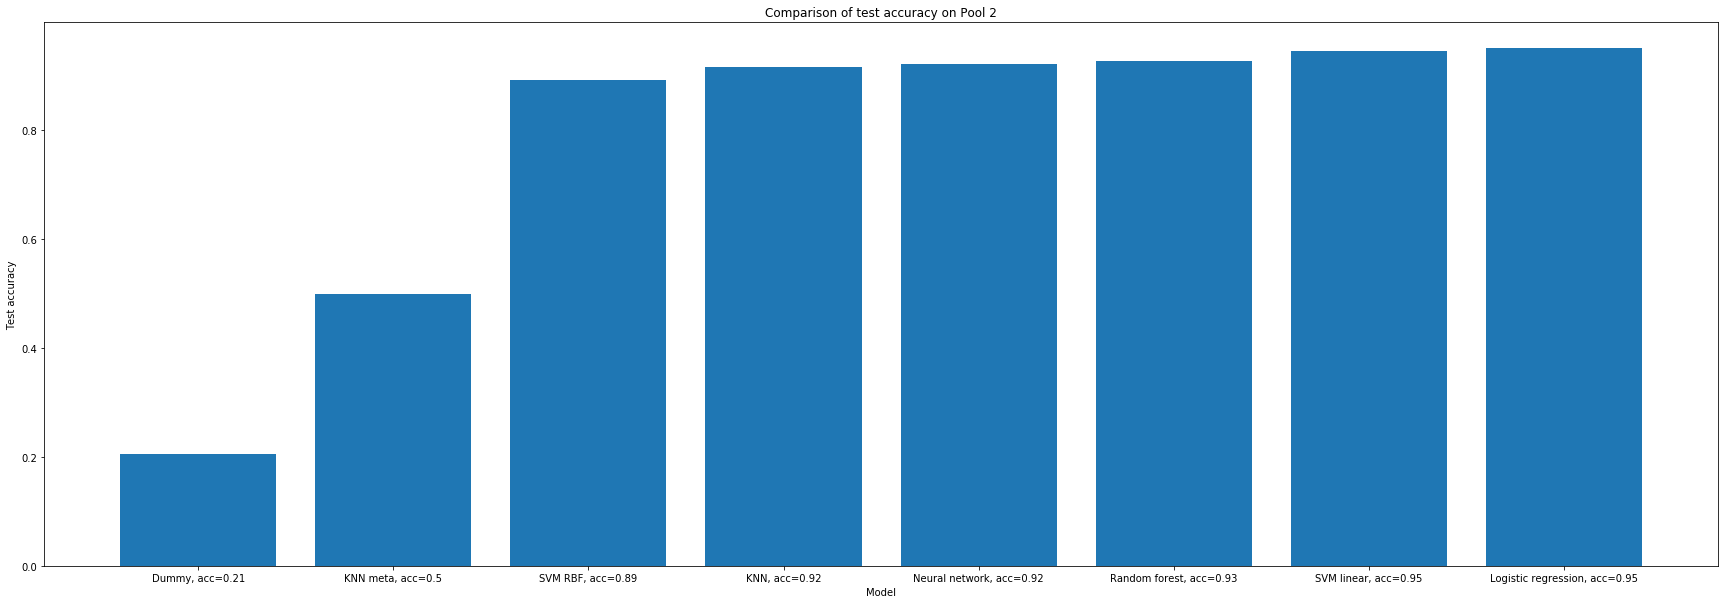

In [11]:
#plot accuracy of each model
plt.figure(figsize=(30,10))
plt.bar(list(np.arange(len(pool2))+1), list(pool2["accuracy"]))
plt.title("Comparison of test accuracy on Pool 2")

for i in range(len(pool2)):
    names
plt.xticks(list(np.arange(len(pool2))+1), names)
plt.xlabel("Model")
plt.ylabel("Test accuracy")
plt.show()

## Misclassification analysis

We can see that the models obtain more or less similar results. The precise results are not very important because they depend on the composition of the train, validation and test sets. However, it is interesting to note that the logisitic regression and the SVM with linear kernel produce exactly the same result.

Metadata alone can provide significantly higher accuracy than the DummyClassifier and can differentiate fairly well between species in different environments. Pyrrhocorax graculus, present in the Alps at high altitudes, is rarely confused with other birds. However, this is not sufficient to differentiate between lake species, which all occur in similar areas and at similar altitudes. The distribution of observations over the year is not decisive in the classification because the classes do not present sufficiently differentiated profiles. This is due to the fact that the species concerned do not have a sufficiently pronounced migratory behaviour, that the number of observations is too small to be statistically significant and that the timing of the observation depends as much on the presence of the bird as on that of the observer.

The features extracted from the images are therefore necessary to achieve high classification accuracy. By inspecting the images that are misclassified, we can see that they often have particular characteristics that fall into one of the following 10 categories :

1. Juveniles have a very different appearance from adults and are often systematically misclassified.
> Ex: ML171328621 is a juvenile Fulica atra misclassified as Podiceps cristatus.
2. Some species show strong sexual dimorphism and one sex is less resembling the other than to another species. In pool 2, this is above all the case of the female Netta rufina which is very often misclassified as Podiceps cristatus. The female Turdus merula also differs slightly from the male, but does not resemble other species.
> Ex: ML155093561 is a female Netta rufina misclassified as Podiceps cristatus
3. Specimens with an unusual colour for the species are confused with another species whose usual colour more closely resembles the colour of the specimen.
> Ex : ML187212231 is a grey Cygnus olor misclassified as Podiceps cristatus / ML173059761 is a white-spotted Fulica atra misclassified as Chroicocephalus ridibundus
4. Specimens photographed in a position unusual for the species are mistaken for another species for which the position is common. 
> Ex ML189776781 is a Cygnus olor in flight misclassified as Chroicocephalus ridibundus.
5. Some images contain multiple species and are misclassified with high probability.
> Ex: ML166553541 is labelled as Fulica atra and misclassified as Cygnus olor, but the image contains both species / ML112470111 is labelled as Fulica atra and misclassified as Podiceps cristatus. The image contains no Podiceps cristatus but 4 Fulica atra, a male Netta rufina and a female.
6. Some birds are photographed at too great a distance to be identifiable from the background and are systematically misclassified.
> Ex: ML38070711 is labelled Netta rufina and misclassified as Fulica atra; in the picture only boats can be seen / ML198644951 is labelled Fulica atra and misclassified as Netta rufina; in the picture only a large group of dark birds can be seen at 100m.
7. In some images, the bird is close enough to be recognized visually, but still occupies only a small portion of the image relative to the background. Misclassifications between lake species then occur. Even though the background is almost always a water surface, it is possible that certain light levels are more randomly present for certain species in the dataset and that this may lead to misclassification. In this case, the problem is that the pixels in the background play a greater role in the classification than the pixels of the bird itself.
> ML54145111 is a Fulica atra misclassified as Podiceps cristatus / ML114926971 is a Netta rufina misclassified as Podiceps cristatus / ML106693951 is a Podiceps cristatus misclassified as Netta rufina
8. Specimens present in an environment more common for another species are regularly misclassified.
> Ex: ML167856591 is a Turdus merula in flight in front of rocks and misclassified as Pyrrhocorax graculus / ML176744871 is a Turdus merula photographed at the water's edge in front of reeds and misclassified as Fulica atra / ML41377851 is a Fulica atra photographed in green vegetation and misclassified as Turdus merula.
9. For some photos, an unusual background induces a misclassification even if it does not correspond to an environment common to another species.
> Ex: ML127044901 is a Turdus merula photographed on a gutter and misclassified as Netta rufina.
10. Some photos are taken at a reasonable distance, but are cropped incorrectly by the algorithm, so that the bird does not appear or not entirely.
> Ex: ML200196631 is a Chroicocephalus ridibundus misclassified as Pyrrhocorax graculus. On the picture, we can only see the statue on which the bird is.

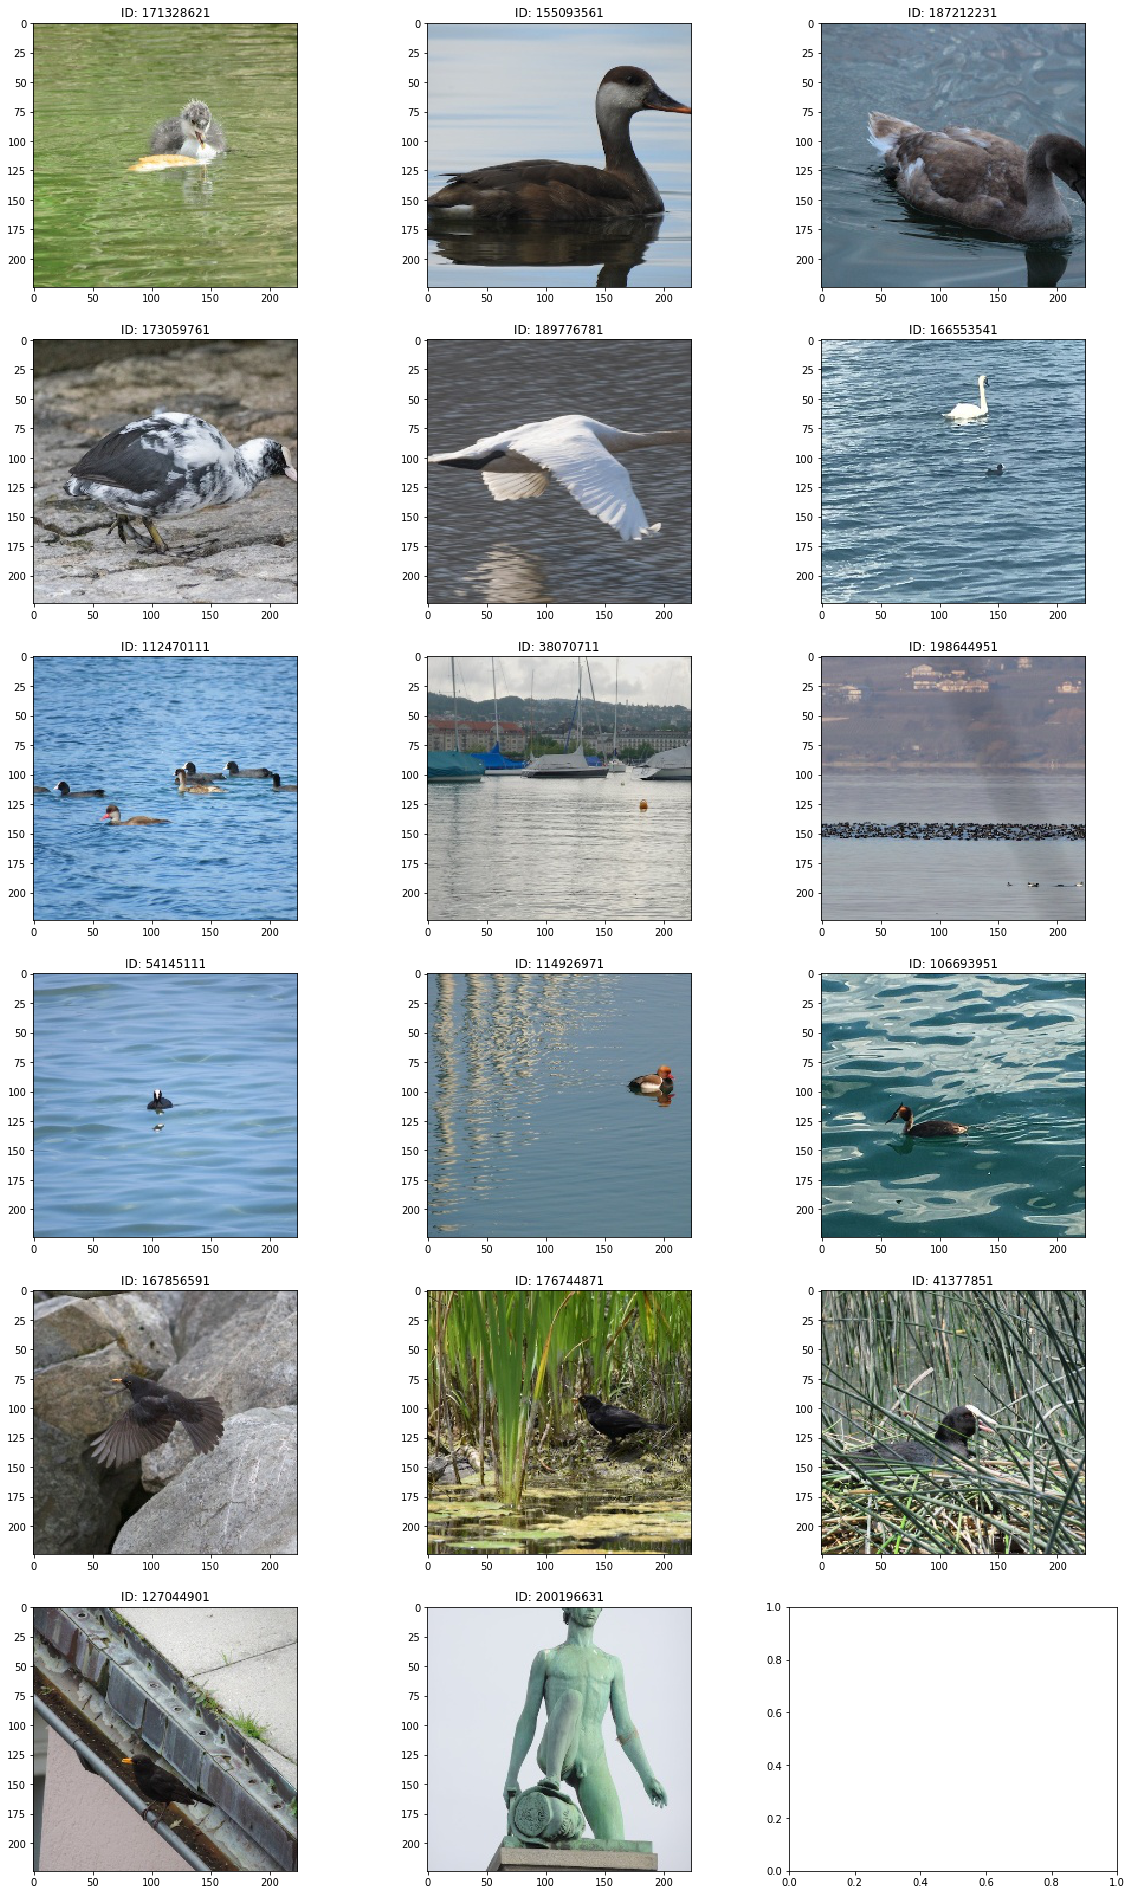

In [29]:
#define the id of the images of interest
ID = [171328621,
 155093561,
 187212231,
 173059761,
 189776781,
 166553541,
 112470111,
 38070711,
 198644951,
 54145111,
 114926971,
 106693951,
 167856591,
 176744871,
 41377851,
 127044901,
 200196631]

#define number of images of interest
n = len(ID)

#plot the images of interest
fig,axes = plt.subplots(nrows=math.ceil(n/3), ncols=3)
fig.set_figwidth(20)
fig.set_figheight(n*2)

for i in range(n):
    #define current index
    currid = ID[i]
    #get the current image
    img = np.array(Image.open(data[data["ML Catalog Number"]==currid]["crop_storage"].values[0]))
    #plot the images
    axes.ravel()[i].imshow(img)
    #print the index as title
    axes.ravel()[i].set_title("ID: {}".format(currid))

plt.show()

## Solutions by data collection

Many of the problems mentioned above can be solved by better labelling of observations. In the original dataset, some variables that can solve these problems exist but very few values are entered. Provided we have access to it, we can construct the user data entry process in such a way that these values must be entered to submit an image. In the context of an application, these mandatory labeling steps can take the form of a list of predefined choices, which limits the effort required of the user and ensures that there are categories that can be used to filter the observations. Having these categories available would significantly increase the accuracy of classification. However, care must be taken not to impose too many mandatory steps on users, otherwise the process would be tedious and discourage data entry. 

In particular, the following problems can be solved by better labelling:

- Problems 1 and 2 can be solved by introducing a mandatory labeling step that asks the user to categorize the observation as male, female or juvenile. A further distinction can be made between fledglings and juveniles when the latter differ from adults in plumage, for example, as in the case of Larus Michaellis. Categories can be defined for each species according to its specificities for greater precision or for all species for simplicity. Juveniles may be considered as an additional class if their numbers are sufficient or excluded otherwise. Considering males and females with strong sexual dimorphism as different classes should help classification, but it may also create an imbalance in classes that needs to be compensated for.
- Problem 3 can be solved by introducing a mandatory labelling step that requires the user to mark specimens with particular characteristics. Input options can typically be limited by a species-specific pick-list when appearance variants are common (e.g. Grey Swan) in order to obtain more easily exploitable values. In general, however, the most important thing is to separate special specimens from the mass of normal specimens. Unless very large amounts of data are available, special specimens cannot constitute balanced classes, and they will simply be excluded.
- Problem 4 can be partially solved by introducing a mandatory labeling step that asks the user to specify the type of shot. In order to obtain usable results, it is important here to limit the choices to a species-specific list (e.g. for Cygnus olor: in flight, on the ground, on the water, bird group, macro, special position). If these categories are large enough, they may constitute classes, but it is more likely to exclude unusual shots.
- Problem 5 can be solved by introducing a mandatory labeling step that asks users to report the different species present in the photo. This labeling can be refined by specifying the number of specimens of each species but this can quickly become tedious and the main thing is to identify images containing several species. An additional possbility is to ask the user to frame the birds and enter them as separate observations.
- Problems 6 to 10 can be solved by asking the user to frame the birds in the picture or to report if this is not possible (too far away, too large a group). Better framing of birds avoids errors due to the presence of several birds, the absence of recognizable birds, and unusual background, but may increase errors due to the physical similarity between some species since the background will be less able to differentiate between them. In pool 2, this mainly concerns Pyhrrocorax graculus and Turdus merula, which are present in rather different environments. However, the benefit seems to be more important than the loss, because the errors thus avoided are numerous and the two similar species can be differentiated by the metadata.

These solutions avoid having to do a lot of data processing work, but require access to the data entry process, for example through our own platform or application. If we simply retrieve data collected by third parties, other solutions are necessary to try to retrieve the same information.

## Solutions by data processing

In the event that we do not have access to the user input process, we may implement the following strategies to attempt to collect the same information:

- A better cropping of the photos directly solves problems 7-10 and indirectly solves problems 5-6. It is worth developing a powerful cropping algorithm that accurately selects specimens. Rather than using a fairly rudimentary method that detects interesting features in photos, a promising approach is to use an algorithm specifically trained to recognize birds. All birds share a number of common characteristics, and this allows the specimen to be separated from the background and other objects.
    - In the case of problem 6, however, it is possible that the algorithm does not find a bird and selects another salient object. However, these cases are limited and an improvement is likely even for this problem. 
    - In the case of Problem 5, the presence of a very large number of birds can lead to the same situation, or to the fact that the cropped images have too few pixels to be usable. However, it is sufficient to simply eliminate images with less than 224 pixels by 224.
    - On the other hand, applying the cropping algorithm to images with too many pixels can be very expensive in terms of computing power. It may be useful to decrease the resolution of very large images beforehand.
    - Finally, the cropping algorithm may not define a square frame. If we want to keep the functions used here that require square images, the best solution seems to me to adapt the cropping algorithm so that it provides the coordinates of the frame in the original image, but without eliminating the rest. We could then use these coordinates to define the best square frame of the specimen.
- The 10 problems identified result in the features of misclassified images being far away from the features of other images of this species. By displaying the 2 principal components of the features extracted from the images, we can see that some observations are far from the mass of observations of this species. We could try to calculate the center of the cloud of observations for the n principal components, then define a threshold of distance from this center beyond which the observations are considered as outliers. However, it is almost impossible to find the right threshold other than by trials, and the method as a whole remains rather rough. This selection should be learned by the algorithm and not done manually . However, it would be interesting to display a representation of the two or three principal components after a precise cropping with the above mentioned algorithm. The species should then be more distinct on the representation
- An interesting approach for problems 1-4 would be to use an unsupervised algorithm only on features of the same species to isolate special specimens and separate the male and female Netta rufina.
- Problems 4, 8 and 9 can be addressed by defining the average colour of each species to identify images with unusual colours. If an efficient cropping algorithm is used beforehand, only problem 4 is really important and this solution seems promising in this case.
- The variance of the laplacian can be used to identify images with a uniform (low value) or complex (high value) background. This makes it possible to identify problematic images for problems 6 and 7, as long as the background is uniform or complex. However, this method is not as good as a precise cropping algorithm because it does not produce a better image of the specimen. The best we can do with spotted problematic images is to exclude them from features. One can also use the variance of the laplacian for problems 8 and 9 by displaying its distribution to spot outliers. The involved images can then be excluded. With respect to Problem 5, it is also possible that a high variance of the laplacian may reveal a high number of specimens if those contrast with the background.

![pac2](data/other/pca2_plot.png)

## Perspectives

This project can be seen as a first step in the development of a more powerful classification algorithm for a coherent group of birds. Through my work, I was able to get an idea of the possibilities in this field and identify areas for improvement. In the future, I would like to develop this project in the following steps:

1. Test improvement options on the same data in order to assess their potential.
2. Define a coherent group of birds of interest to potential users. This group will typically be larger than the pools defined in this project, which increases the difficulty of classifying ceteris paribus and possibly calls for the use of more observations and other models. If I decide to develop an application, a pool containing common lake species seems a tempting idea. These are indeed easily observable by potential non-specialist users. Moreover, the number of these species is large enough to represent a difficulty for the beginner while constituting an ambitious but feasible classification task.
3. Build a structure for the online storage and operation of the algorithm and data.
4. Create an interface for users to enter data and obtain a prediction.
5. Develop a process to improve the performance of the algorithm with the data transmitted by users.
6. Address legal issues.